In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('trimmed_df_2.csv')
print(f"Percent of rows in dataframe with appliances listed: {round((df['Appliances'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with heating type listed: {round((df['Heating'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with hot water type listed: {round((df['HotWater'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with parking type listed: {round((df['Parking'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with house style listed: {round((df['Style'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with attic listed: {round((df['Attic'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with number of beds listed: {round((df['Beds'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with number of bathrooms listed: {round((df['Baths'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with number of fireplaces listed: {round((df['Fireplaces'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with number of stories listed: {round((df['Stories'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")
print(f"Percent of rows in dataframe with presence of Home Owners Association listed: {round((df['HOA'].count() / df['Unnamed: 0'].count()) * 100, 2)}%")

Percent of rows in dataframe with appliances listed: 81.87%
Percent of rows in dataframe with heating type listed: 100.0%
Percent of rows in dataframe with hot water type listed: 100.0%
Percent of rows in dataframe with parking type listed: 100.0%
Percent of rows in dataframe with house style listed: 100.0%
Percent of rows in dataframe with attic listed: 100.0%
Percent of rows in dataframe with number of beds listed: 100.0%
Percent of rows in dataframe with number of bathrooms listed: 100.0%
Percent of rows in dataframe with number of fireplaces listed: 100.0%
Percent of rows in dataframe with number of stories listed: 100.0%
Percent of rows in dataframe with presence of Home Owners Association listed: 100.0%


In [23]:
df['Baths'] = df['BathsFull'] + (df['BathsHalf'] * 0.5)
df['Attic'] = df.Attic.map(dict(Yes=1, No=0))
df['HOA'] = df.HOA.astype(int)

In [105]:
appliances = []
i = 0

for item in df['Appliances']:
    item_list = str(df['Appliances'][i]).split(", ")
    j = 0
    for item in item_list:
        if item_list[j] not in appliances:
            if item_list[j] != 'nan':
                appliances.append(item)
                j += 1
        else:
            j += 1
    i += 1

appliances_df = df.dropna(subset=['Appliances'])
appliances_df = appliances_df[['Appliances', 'Beds', 'Baths', 'ClosePrice']]

appliance_names = []
has_appliance = []
appliance_corr = []

def appliance_column (row):
    if appliance in str(row['Appliances']).split(", "):
        return 1
    else:
        return 0
    
for appliance in appliances:
    appliance_names.append(f"Appliance - {appliance}")
    appliances_df[appliance] = appliances_df.apply(appliance_column, axis=1)
    counts = appliances_df[appliance].value_counts()
    has_appliance.append(round((((counts[1])/appliances_df[appliance].count())*100.00), 2))
    corr = appliances_df[[appliance, 'ClosePrice']].corr()
    appliance_corr.append(corr['ClosePrice'][appliance])
    
appliance_stats_df = pd.DataFrame({"Appliance":appliance_names, "% With":has_appliance, "Close Price Correlation": appliance_corr})
appliance_stats_df = appliance_stats_df[['Appliance', '% With', 'Close Price Correlation']]

print(f"Unique Appliances: {len(appliances)}")

appliance_stats_df = appliance_stats_df.set_index('Appliance')
appliance_stats_df.sort_values('Close Price Correlation', ascending=False).head()

Unique Appliances: 42


,% With,Close Price Correlation
Appliance,,
Appliance - Six Burner Stove,5.07,0.424971
Appliance - Oven - Double,7.37,0.398229
Appliance - Oven - Wall,11.21,0.376887
Appliance - Range Hood,15.33,0.352129
Appliance - Cooktop,12.00,0.309062


In [106]:
heating_types = []
i = 0

for item in df['Heating']:
    item_list = str(df['Heating'][i]).split(", ")
    j = 0
    for item in item_list:
        if item_list[j] not in heating_types:
            if item_list[j] != 'nan':
                heating_types.append(item)
                j += 1
        else:
            j += 1
    i += 1

heating_df = df.dropna(subset=['Heating'])
heating_df = heating_df[['Heating', 'ClosePrice']]

heating_type_names = []
has_heating_type = []
heating_type_corr = []

def heating_column (row):
    if heating_type in str(row['Heating']).split(", "):
        return 1
    else:
        return 0
    
for heating_type in heating_types:
    heating_type_names.append(f"Heating - {heating_type}")
    heating_df[heating_type] = heating_df.apply(heating_column, axis=1)
    counts = heating_df[heating_type].value_counts()
    has_heating_type.append(round((((counts[1])/heating_df[heating_type].count())*100.00), 2))
    corr = heating_df[[heating_type, 'ClosePrice']].corr()
    heating_type_corr.append(corr['ClosePrice'][heating_type])
    
heating_stats_df = pd.DataFrame({"Heating Type":heating_type_names, "% With":has_heating_type, "Close Price Correlation": heating_type_corr})
heating_stats_df = heating_stats_df[['Heating Type', '% With', 'Close Price Correlation']]

print(f"Unique Heating Types: {len(heating_types)}")

heating_stats_df = heating_stats_df.set_index('Heating Type')
heating_stats_df.sort_values('Close Price Correlation', ascending=False).head()

Unique Heating Types: 23


,% With,Close Price Correlation
Heating Type,,
Heating - Zoned,5.71,0.406001
Heating - Programmable Thermostat,3.92,0.185685
Heating - ENERGY STAR Heating System,2.40,0.172193
Heating - Forced Air,60.51,0.163975
Heating - 90% Forced Air,2.56,0.118883


In [107]:
hot_water_types = []
i = 0

for item in df['HotWater']:
    item_list = str(df['HotWater'][i]).split(", ")
    j = 0
    for item in item_list:
        if item_list[j] not in hot_water_types:
            if item_list[j] != 'nan':
                hot_water_types.append(item)
                j += 1
        else:
            j += 1
    i += 1

hot_water_df = df.dropna(subset=['HotWater'])
hot_water_df = hot_water_df[['HotWater', 'ClosePrice']]

hot_water_type_names = []
has_hot_water_type = []
hot_water_type_corr = []

def hot_water_column (row):
    if hot_water_type in str(row['HotWater']).split(", "):
        return 1
    else:
        return 0
    
for hot_water_type in hot_water_types:
    hot_water_type_names.append(f"Hot Water - {hot_water_type}")
    hot_water_df[hot_water_type] = hot_water_df.apply(hot_water_column, axis=1)
    counts = hot_water_df[hot_water_type].value_counts()
    has_hot_water_type.append(round((((counts[1])/hot_water_df[hot_water_type].count())*100.00), 2))
    corr = hot_water_df[[hot_water_type, 'ClosePrice']].corr()
    hot_water_type_corr.append(corr['ClosePrice'][hot_water_type])
    
hot_water_stats_df = pd.DataFrame({"Hot Water Type":hot_water_type_names, "% With":has_hot_water_type, "Close Price Correlation": hot_water_type_corr})
hot_water_stats_df = hot_water_stats_df[['Hot Water Type', '% With', 'Close Price Correlation']]

print(f"Unique Hot Water Types: {len(hot_water_types)}")

hot_water_stats_df = hot_water_stats_df.set_index('Hot Water Type')
hot_water_stats_df.sort_values('Close Price Correlation', ascending=False).head()

Unique Hot Water Types: 11


,% With,Close Price Correlation
Hot Water Type,,
Hot Water - Natural Gas,60.77,0.289219
Hot Water - 60 or More Gallon Tank,4.15,0.251529
Hot Water - Tankless Water Heater,2.37,0.092613
Hot Water - Multi-tank,0.29,0.054249
Hot Water - Solar Water Heater,0.10,0.020962


In [108]:
parking_types = []
i = 0

for item in df['Parking']:
    item_list = str(df['Parking'][i]).split(", ")
    j = 0
    for item in item_list:
        if item_list[j] not in parking_types:
            if item_list[j] != 'nan':
                parking_types.append(item)
                j += 1
        else:
            j += 1
    i += 1

parking_df = df.dropna(subset=['Parking'])
parking_df = parking_df[['Parking', 'ClosePrice']]

parking_type_names = []
has_parking_type = []
parking_type_corr = []

def parking_column (row):
    if parking_type in str(row['Parking']).split(", "):
        return 1
    else:
        return 0
    
for parking_type in parking_types:
    parking_type_names.append(f"Parking - {parking_type}")
    parking_df[parking_type] = parking_df.apply(parking_column, axis=1)
    counts = parking_df[parking_type].value_counts()
    has_parking_type.append(round((((counts[1])/parking_df[parking_type].count())*100.00), 2))
    corr = parking_df[[parking_type, 'ClosePrice']].corr()
    parking_type_corr.append(corr['ClosePrice'][parking_type])
    
parking_stats_df = pd.DataFrame({"Parking Type":parking_type_names, "% With":has_parking_type, "Close Price Correlation": parking_type_corr})
parking_stats_df = parking_stats_df[['Parking Type', '% With', 'Close Price Correlation']]

print(f"Unique Parking Types: {len(parking_types)}")

parking_stats_df = parking_stats_df.set_index('Parking Type')
parking_stats_df.sort_values('Close Price Correlation', ascending=False).head()

Unique Parking Types: 44


,% With,Close Price Correlation
Parking Type,,
Parking - Garage,43.71,0.388699
Parking - Drvwy/Off Str,25.81,0.264172
Parking - Attached,3.34,0.247723
Parking - Garage Door Opener,6.42,0.212241
Parking - Paved Driveway,5.97,0.160984


In [109]:
style_types = []
i = 0

for item in df['Style']:
    item_list = str(df['Style'][i]).split(", ")
    j = 0
    for item in item_list:
        if item_list[j] not in style_types:
            if item_list[j] != 'nan':
                style_types.append(item)
                j += 1
        else:
            j += 1
    i += 1

style_df = df.dropna(subset=['Style'])
style_df = style_df[['Style', 'ClosePrice']]

style_type_names = []
has_style_type = []
style_type_corr = []

def style_column (row):
    if style_type in str(row['Style']).split(", "):
        return 1
    else:
        return 0
    
for style_type in style_types:
    style_type_names.append(f"Style - {style_type}")
    style_df[style_type] = style_df.apply(style_column, axis=1)
    counts = style_df[style_type].value_counts()
    has_style_type.append(round((((counts[1])/style_df[style_type].count())*100.00), 2))
    corr = style_df[[style_type, 'ClosePrice']].corr()
    style_type_corr.append(corr['ClosePrice'][style_type])
    
style_stats_df = pd.DataFrame({"Style Type":style_type_names, "% With":has_style_type, "Close Price Correlation": style_type_corr})
style_stats_df = style_stats_df[['Style Type', '% With', 'Close Price Correlation']]

print(f"Unique Style Types: {len(style_types)}")

style_stats_df = style_stats_df.set_index('Style Type')
style_stats_df.sort_values('Close Price Correlation', ascending=False).head()

Unique Style Types: 33


,% With,Close Price Correlation
Style Type,,
Style - Craftsman,4.83,0.360979
Style - Arts & Crafts,1.23,0.191540
Style - Farm House,0.49,0.142431
Style - French Country,0.06,0.108207
Style - Villa,0.03,0.096769


In [110]:
amenities_df = pd.concat([appliance_stats_df, heating_stats_df, hot_water_stats_df, parking_stats_df, style_stats_df])
amenities_df.sort_values('Close Price Correlation', ascending=False).head()

,% With,Close Price Correlation
Appliance - Six Burner Stove,5.07,0.424971
Heating - Zoned,5.71,0.406001
Appliance - Oven - Double,7.37,0.398229
Parking - Garage,43.71,0.388699
Appliance - Oven - Wall,11.21,0.376887


In [117]:
df_merged1 = appliances_df.merge(heating_df, how='outer', left_index=True, right_index=True)
df_merged2 = hot_water_df.merge(parking_df, how='outer', left_index=True, right_index=True)
df_merged3 = df_merged1.merge(style_df, how='outer', left_index=True, right_index=True)
final_merged_df = df_merged3.merge(df_merged2, how='outer', left_index=True, right_index=True)
final_merged_df['Attic'] = df['Attic']
final_merged_df['Beds'] = df['Beds']
final_merged_df['Baths'] = df['Baths']
final_merged_df['Fireplaces'] = df['Fireplaces']
final_merged_df['Stories'] = df['Stories']
final_merged_df['HOA'] = df['HOA']
final_merged_df.drop(['ClosePrice_y_x', 'ClosePrice_x_y', 'ClosePrice_y_y'], axis=1, inplace=True)
final_merged_df.rename(columns={'ClosePrice_x_x':'ClosePrice'}).head()

,Appliances,Beds,Baths,ClosePrice,Dishwasher,Disposal,Refrigerator,Range Hood,Oven / Range - Gas,Cooktop,...,Unpaved,DW - Circular,Attendant,Faces Rear,Riverstone Driveway,PublPark,Attic,Fireplaces,Stories,HOA
0,"Dishwasher, Disposal, Refrigerator, Range Hood...",2,1.0,185000.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,No,0,1,False
1,"Cooktop, Dishwasher, Disposal, Dryer, Exhaust ...",3,2.5,1700000.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,No,0,1,True
2,"ENERGY STAR Dishwasher, ENERGY STAR Refrigerat...",7,7.5,1625000.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,Yes,1,4,False
3,"Dishwasher, Disposal, Oven / Range - Gas, Refr...",2,2.5,430000.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,Yes,0,3,False
4,"Dishwasher, Disposal, Exhaust Fan, Microwave, ...",2,1.0,362000.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,No,0,1,True


In the plot below:
Zoned = Zoned Heating
Craftsman = Craftsman Style House


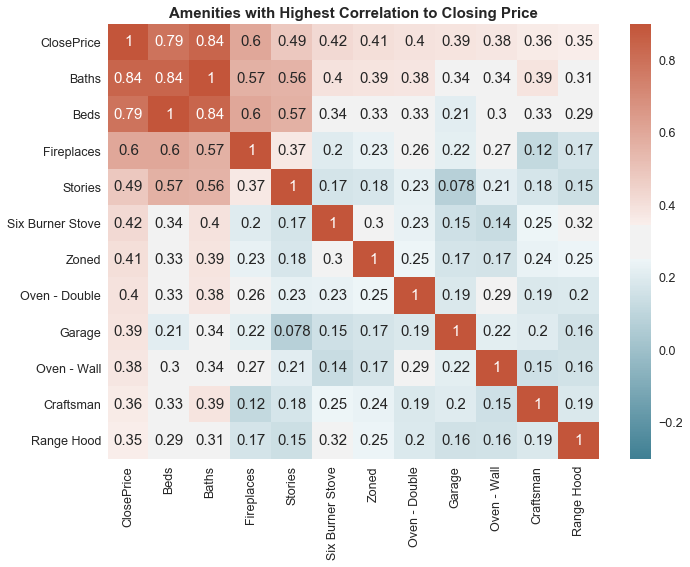

In [127]:
pos_corr_list = ['ClosePrice', 'Attic', 'Beds', 'Baths', 'Fireplaces', 'Stories']

for item in amenities_df.sort_values('Close Price Correlation', ascending=False).index[0:7]:
    if item.split(" - ")[0] == 'Appliance':
        item = item.split('Appliance - ')
        pos_corr_list.append(item[1])
    elif item.split(" - ")[0] == 'Heating':
        item = item.split('Heating - ')
        pos_corr_list.append(item[1])
    elif item.split(" - ")[0] == 'Hot Water':
        item = item.split('Hot Water - ')
        pos_corr_list.append(item[1])
    elif item.split(" - ")[0] == 'Parking':
        item = item.split('Parking - ')
        pos_corr_list.append(item[1])
    elif item.split(" - ")[0] == 'Style':
        item = item.split('Style - ')
        pos_corr_list.append(item[1])

print("In the plot below:")
print("Zoned = Zoned Heating")
print("Craftsman = Craftsman Style House")
        
pos_corr = final_merged_df[pos_corr_list].corr().sort_values('ClosePrice', ascending=False)
fig, ax = plt.subplots(figsize=(11, 8)) 
sns.set(font_scale=1.25)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(pos_corr, cmap=cmap, vmin=-0.3, vmax=0.9, annot=True)
plt.title('Amenities with Highest Correlation to Closing Price', fontweight='bold')
plt.savefig('Images/Positive Amenity Correlation Matrix.PNG')

In the plot below:
Contemporary = Contemporary Style House
Gen Comm Elem = General Commercial Element Parking
Assigned = Assigned Parking
Unassigned = Unassigned Parking
Electric = Electric Hot Water


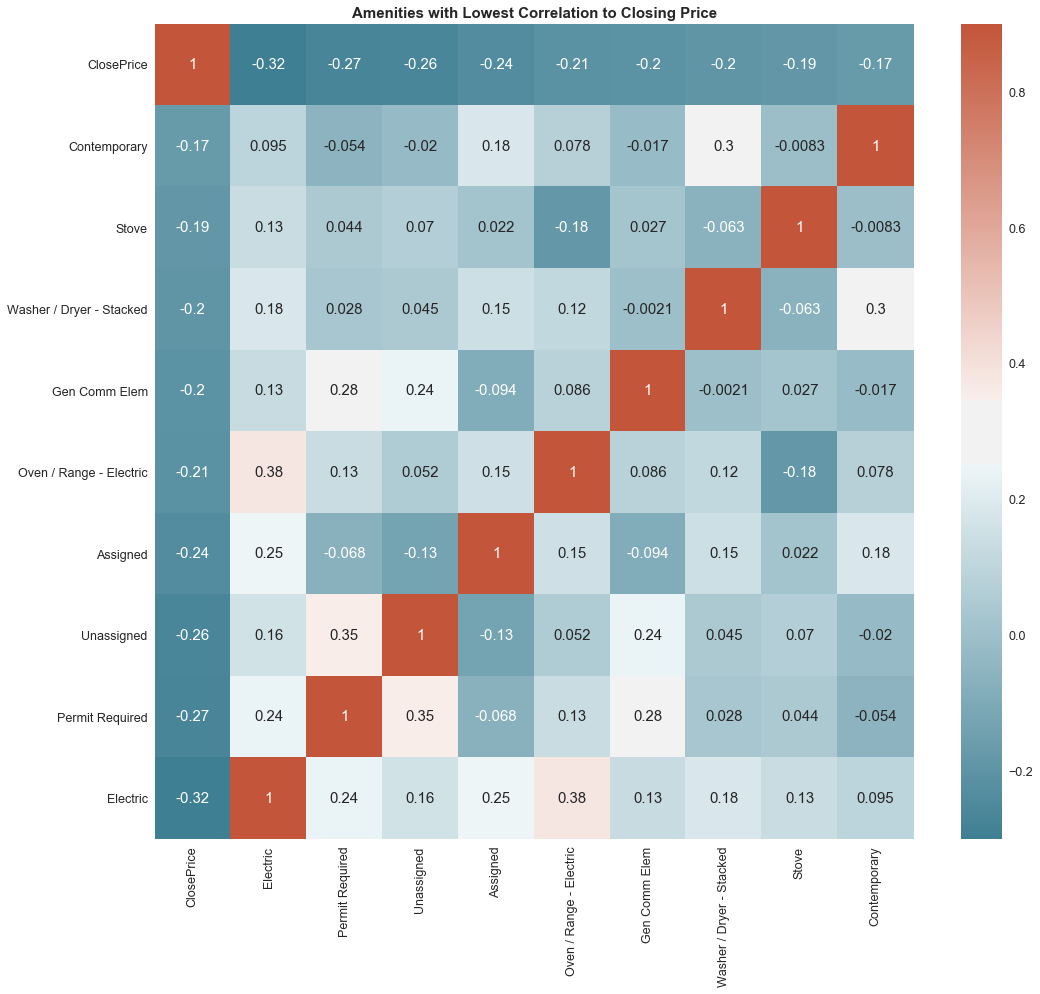

In [123]:
neg_corr_list = ['ClosePrice']

for item in amenities_df.sort_values('Close Price Correlation').index[0:9]:
    if item.split(" - ")[0] == 'Appliance':
        item = item.split('Appliance - ')
        neg_corr_list.append(item[1])
    elif item.split(" - ")[0] == 'Heating':
        item = item.split('Heating - ')
        neg_corr_list.append(item[1])
    elif item.split(" - ")[0] == 'Hot Water':
        item = item.split('Hot Water - ')
        neg_corr_list.append(item[1])
    elif item.split(" - ")[0] == 'Parking':
        item = item.split('Parking - ')
        neg_corr_list.append(item[1])
    elif item.split(" - ")[0] == 'Style':
        item = item.split('Style - ')
        neg_corr_list.append(item[1])
        
print("In the plot below:")
print("Contemporary = Contemporary Style House")
print("Gen Comm Elem = General Commercial Element Parking")
print("Assigned = Assigned Parking")
print("Unassigned = Unassigned Parking")
print("Electric = Electric Hot Water")

neg_corr = final_merged_df[neg_corr_list].corr().sort_values('ClosePrice', ascending=False)
fig, ax = plt.subplots(figsize=(17, 15)) 
sns.set(font_scale=1.25)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(neg_corr, cmap=cmap, vmin=-0.3, vmax=0.9, annot=True)
plt.title('Amenities with Lowest Correlation to Closing Price', fontweight='bold')
plt.savefig('Images/Negative Amenity Correlation Matrix.PNG')

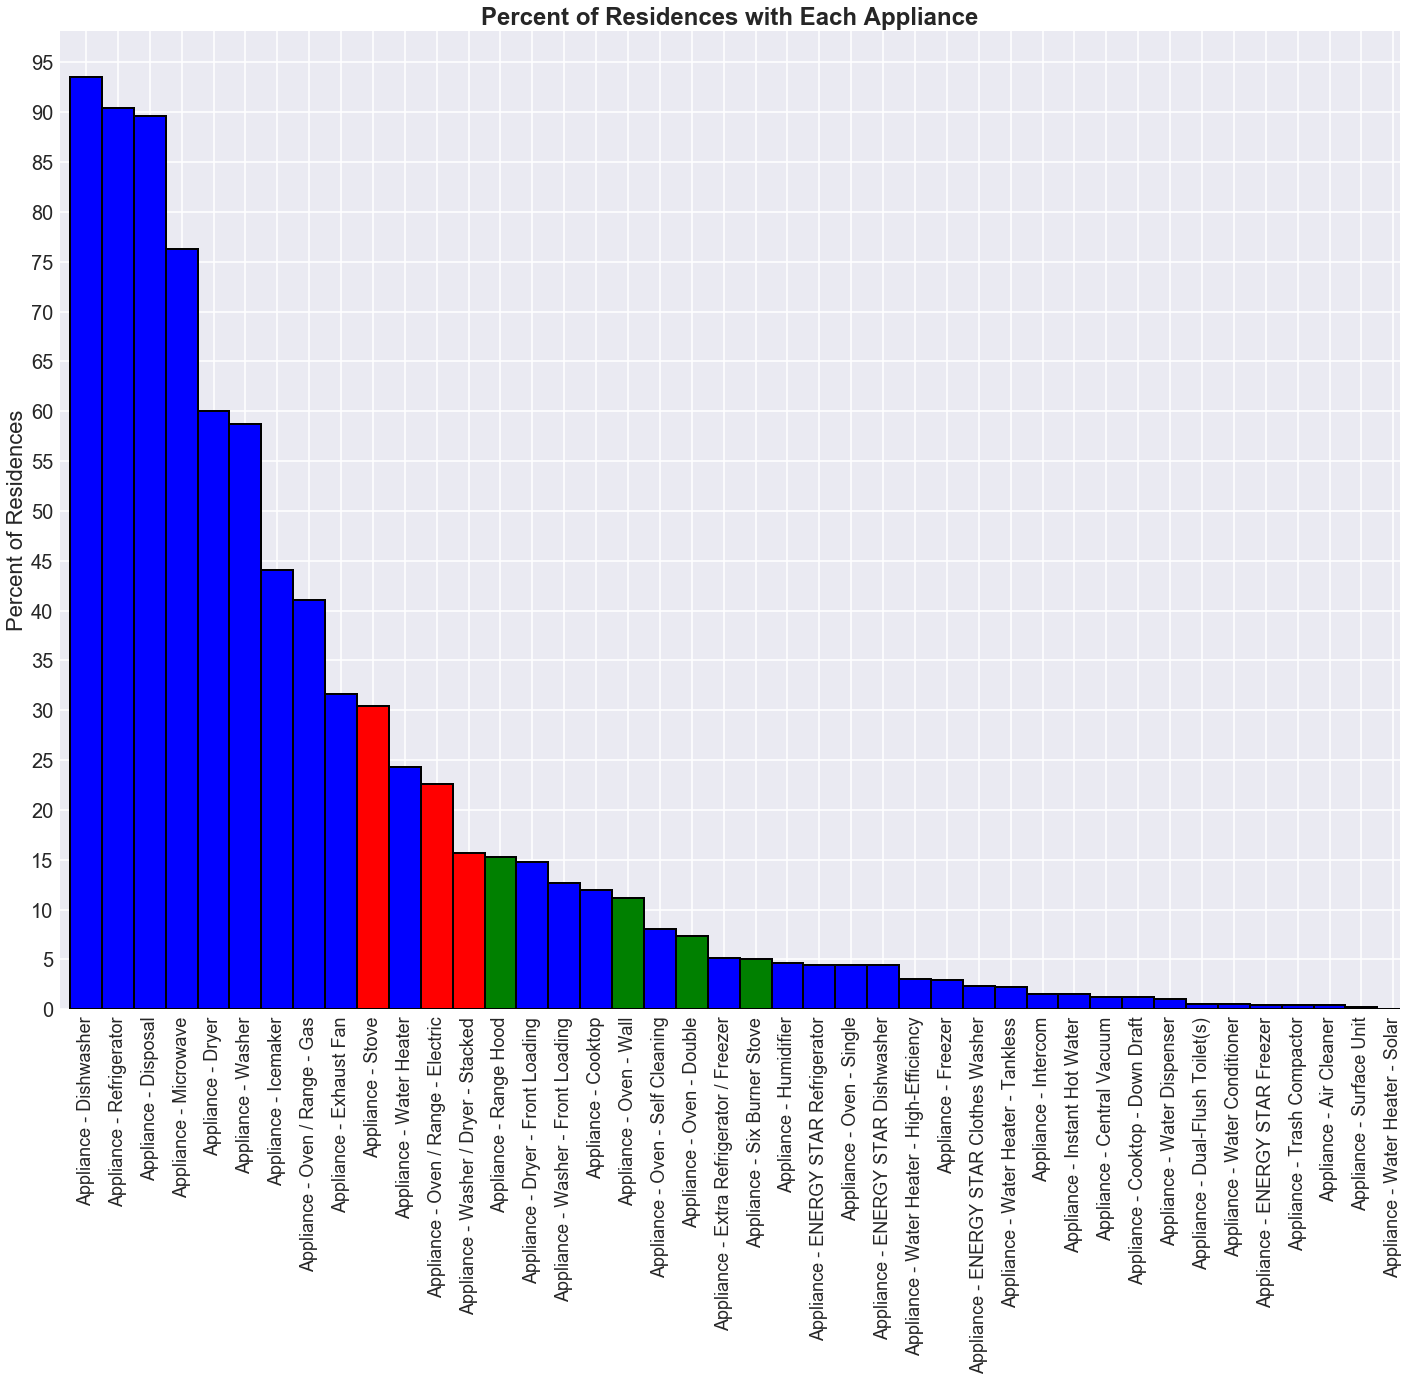

In [125]:
x_values = appliance_stats_df.sort_values('% With', ascending=False).index.values
x_axis = np.arange(len(x_values))
xlabels = x_values
y_values = appliance_stats_df.sort_values('% With', ascending=False)['% With']

colors = []

for value in x_values:
    value = value.split('Appliance - ')
    if value[1] in pos_corr_list:
        colors.append('g')
    elif value[1] in neg_corr_list:
        colors.append('r')
    else:
        colors.append('b')

fig, ax = plt.subplots(figsize=(24,18))
plot = ax.bar(x_axis, y_values, edgecolor='black', width=1.0, color=colors, linewidth=2)

ax.yaxis.set_major_locator(plt.MaxNLocator(20))

for tick in ax.get_yticklabels():
    tick.set_fontsize(20)
    
ax.set_xticks(x_axis)
ax.set_xticklabels(xlabels, rotation='vertical', fontsize=18)

plt.grid(linewidth=2, alpha=0.8)
ax.set_axisbelow(True)
ax.set_xlim(-0.8, len(x_axis) - 0.8)

ax.set_title('Percent of Residences with Each Appliance', fontsize=24, fontweight='bold')
ax.set_ylabel('Percent of Residences', fontsize=22)
plt.savefig('Images/Residences with Appliances.PNG')

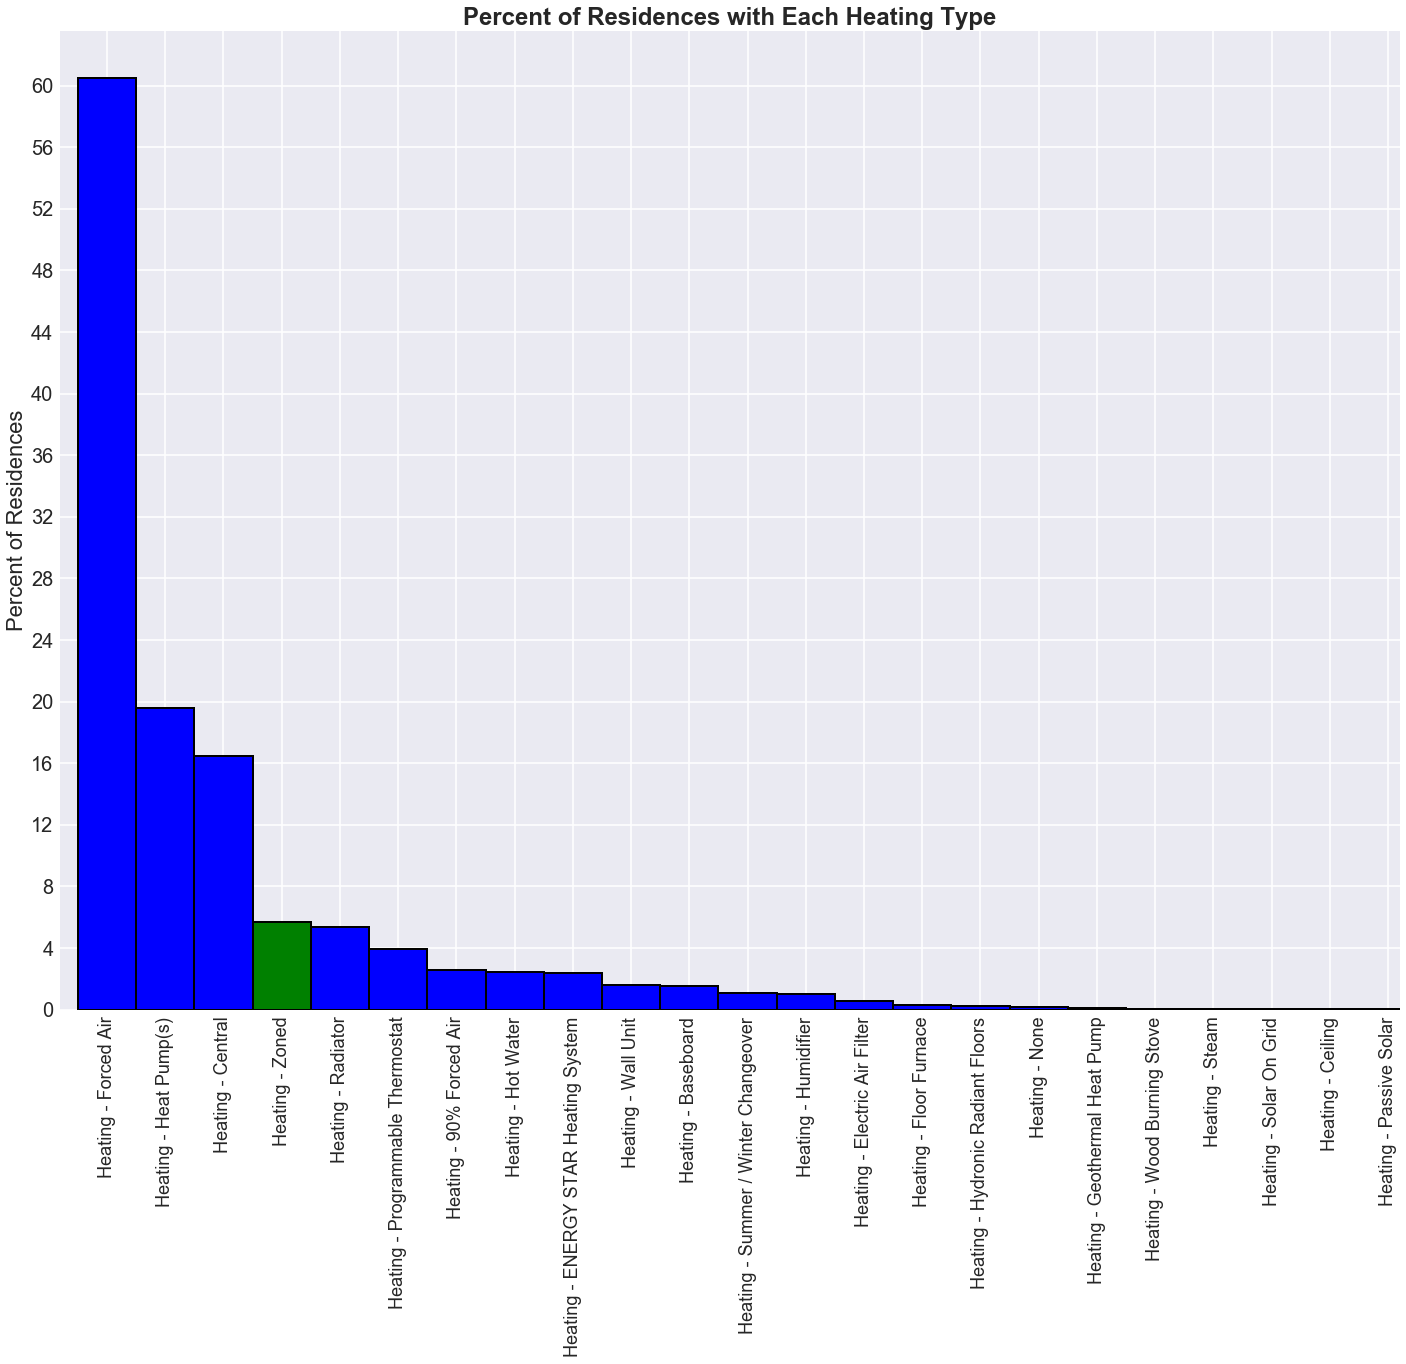

In [126]:
x_values = heating_stats_df.sort_values('% With', ascending=False).index.values
x_axis = np.arange(len(x_values))
xlabels = x_values
y_values = heating_stats_df.sort_values('% With', ascending=False)['% With']

colors = []

for value in x_values:
    value = value.split('Heating - ')
    if value[1] in pos_corr_list:
        colors.append('g')
    elif value[1] in neg_corr_list:
        colors.append('r')
    else:
        colors.append('b')

fig, ax = plt.subplots(figsize=(24,18))
plot = ax.bar(x_axis, y_values, edgecolor='black', width=1.0, linewidth=2, color=colors)

ax.yaxis.set_major_locator(plt.MaxNLocator(20))

for tick in ax.get_yticklabels():
    tick.set_fontsize(20)
    
ax.set_xticks(x_axis)
ax.set_xticklabels(xlabels, rotation='vertical', fontsize=18)

plt.grid(linewidth=2, alpha=0.8)
ax.set_axisbelow(True)
ax.set_xlim(-0.8, len(x_axis) - 0.8)

ax.set_title('Percent of Residences with Each Heating Type', fontsize=24, fontweight='bold')
ax.set_ylabel('Percent of Residences', fontsize=22)
plt.savefig('Images/Residences with Heating.PNG')

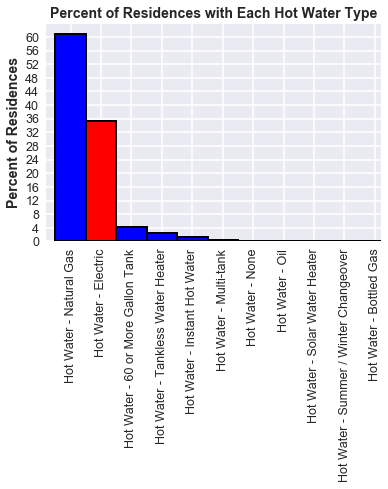

In [128]:
x_values = hot_water_stats_df.sort_values('% With', ascending=False).index.values
x_axis = np.arange(len(x_values))
xlabels = x_values
y_values = hot_water_stats_df.sort_values('% With', ascending=False)['% With']

colors = []

for value in x_values:
    value = value.split('Hot Water - ')
    if value[1] in pos_corr_list:
        colors.append('g')
    elif value[1] in neg_corr_list:
        colors.append('r')
    else:
        colors.append('b')

fig, ax = plt.subplots()
plot = ax.bar(x_axis, y_values, edgecolor='black', width=1.0, linewidth=2, color=colors)

ax.yaxis.set_major_locator(plt.MaxNLocator(20))

ax.set_xticks(x_axis)
ax.set_xticklabels(xlabels, rotation='vertical')

plt.grid(linewidth=2, alpha=0.8)
ax.set_axisbelow(True)
ax.set_xlim(-0.8, len(x_axis) - 0.8)

ax.set_title('Percent of Residences with Each Hot Water Type', fontsize=14, fontweight='bold')
ax.set_ylabel('Percent of Residences', fontsize=14, fontweight='bold')
plt.savefig('Images/Residences with Hot Water.PNG')

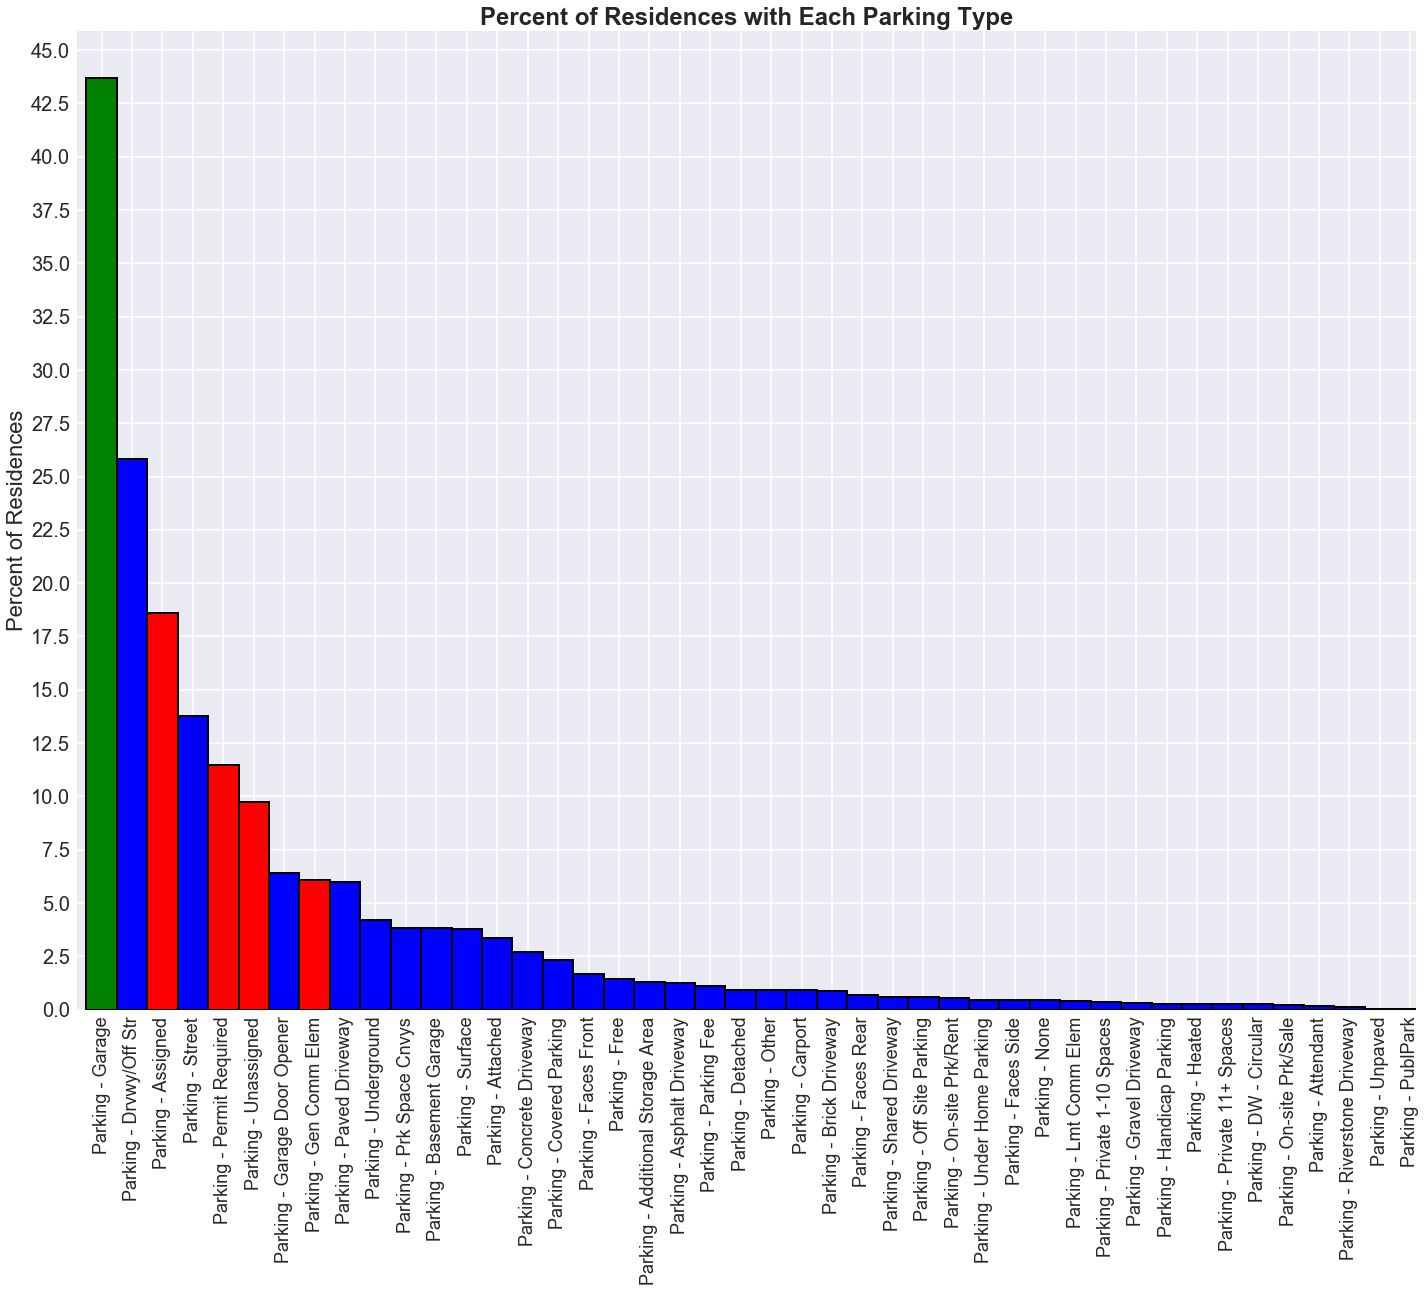

In [130]:
x_values = parking_stats_df.sort_values('% With', ascending=False).index.values
x_axis = np.arange(len(x_values))
xlabels = x_values
y_values = parking_stats_df.sort_values('% With', ascending=False)['% With']

colors = []

for value in x_values:
    value = value.split('Parking - ')
    if value[1] in pos_corr_list:
        colors.append('g')
    elif value[1] in neg_corr_list:
        colors.append('r')
    else:
        colors.append('b')

fig, ax = plt.subplots(figsize=(24,18))
plot = ax.bar(x_axis, y_values, edgecolor='black', width=1.0, linewidth=2, color=colors)

ax.yaxis.set_major_locator(plt.MaxNLocator(20))

for tick in ax.get_yticklabels():
    tick.set_fontsize(20)
    
ax.set_xticks(x_axis)
ax.set_xticklabels(xlabels, rotation='vertical', fontsize=18)

plt.grid(linewidth=2, alpha=0.8)
ax.set_axisbelow(True)
ax.set_xlim(-0.8, len(x_axis) - 0.8)

ax.set_title('Percent of Residences with Each Parking Type', fontsize=24, fontweight='bold')
ax.set_ylabel('Percent of Residences', fontsize=22)
plt.savefig('Images/Residences with Parking.PNG')

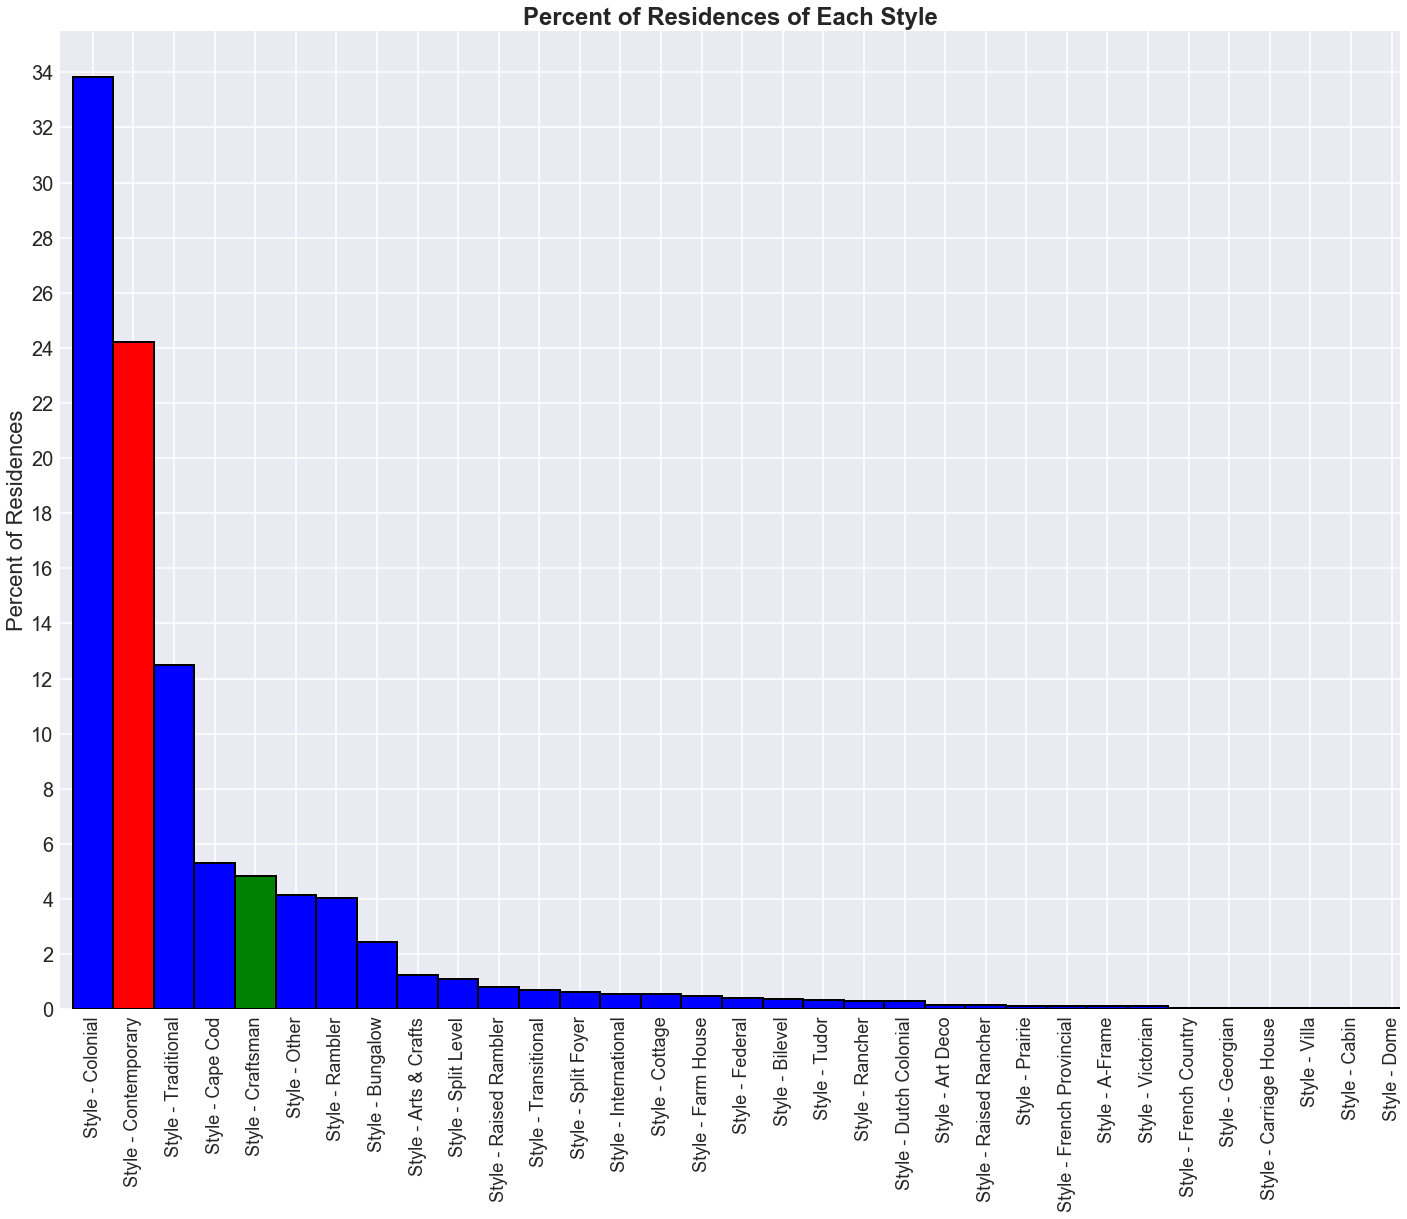

In [132]:
x_values = style_stats_df.sort_values('% With', ascending=False).index.values
x_axis = np.arange(len(x_values))
xlabels = x_values
y_values = style_stats_df.sort_values('% With', ascending=False)['% With']

colors = []

for value in x_values:
    value = value.split('Style - ')
    if value[1] in pos_corr_list:
        colors.append('g')
    elif value[1] in neg_corr_list:
        colors.append('r')
    else:
        colors.append('b')

fig, ax = plt.subplots(figsize=(24,18))
plot = ax.bar(x_axis, y_values, edgecolor='black', width=1.0, linewidth=2, color=colors)

ax.yaxis.set_major_locator(plt.MaxNLocator(20))

for tick in ax.get_yticklabels():
    tick.set_fontsize(20)
    
ax.set_xticks(x_axis)
ax.set_xticklabels(xlabels, rotation='vertical', fontsize=18)

plt.grid(linewidth=2, alpha=0.8)
ax.set_axisbelow(True)
ax.set_xlim(-0.8, len(x_axis) - 0.8)

ax.set_title('Percent of Residences of Each Style', fontsize=24, fontweight='bold')
ax.set_ylabel('Percent of Residences', fontsize=22)
plt.savefig('Images/Residence Styles.PNG')